## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files (I did something janky with Git/Github and had to 
#patch the files into an upload/download situation and so the names are weird.)

mouse_metadata_path = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df=pd.DataFrame(mouse_metadata)
study_results_df=pd.DataFrame(study_results)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="inner")



# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice=combined_df['Mouse ID'].unique()
unique_mice_df=pd.DataFrame(unique_mice)
unique_mice_df


,0
0,k403
1,s185
2,x401
3,m601
4,g791
...,...
244,z314
245,z435
246,z581
247,z795


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice=combined_df.groupby(['Mouse ID', "Timepoint"])
#duplicate_mice_df=pd.DataFrame(duplicate_mice)

#duplicate_mice_df

duplicate_mouse = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mouse


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data=combined_df[combined_df["Mouse ID"]=='g989']
duplicate_mouse_data

#i'm a bit worried about all this NaN business happening here...is this a problem with the merging of the data frames? Should I
#have used inner join instead of append? NM. I went back and used the inner join and now my data populated. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df=combined_df[combined_df["Mouse ID"]!='g989']

clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_data_df['Mouse ID'].unique()
clean_mice_df=pd.DataFrame(clean_mice)
clean_mice_df



,0
0,k403
1,s185
2,x401
3,m601
4,g791
...,...
243,z314
244,z435
245,z581
246,z795


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



summary_statistics_df=clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
summary_statistics_df=pd.DataFrame(summary_statistics_df)

summary_statistics_df["Median Tumor Volume"]=clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Variance"]=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Std.Dev."]=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Std.Err."]=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# clean_data_narrowed_df=clean_data_df.drop(["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
# clean_data_narrowed_df

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#del clean_data_df["Age_months"]
#del clean_data_df["Timepoint"]
#del clean_data_df["Metastatic Sites"]

summary_statistics_df_agg=clean_data_df.groupby("Drug Regimen").agg(['mean','median', 'var', 'std', 'sem'])

summary_statistics_df_agg


#This table shows the correct values, but I got here by using <del> and just chucking the column names that were 
#messing things up.Should I go back and make another dataframe with only one x-axis value ("Tumor Volume(mm3)") and 
#build the agg from there? I tried in the code above and it didn't work so well (now commented out). 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

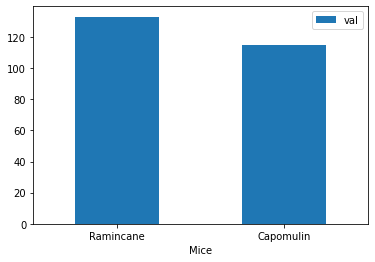

In [73]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


#Why is this only returning two of the drug regimens? What happened to the data?


clean_mice_drugs=clean_data_df['Mouse ID'].unique()
clean_mice_drugs_df=pd.DataFrame(clean_mice_drugs)
clean_mice_drugs_df["Drug Regimen"]=clean_data_df["Drug Regimen"]

clean_mice_drugs_df

mouse_drug_counts=clean_mice_drugs_df["Drug Regimen"].value_counts()
mouse_drug_counts=pd.DataFrame(mouse_drug_counts)

mouse_drug_counts


#I typed these values in. How do I get them to pull from another dataframe?
mouse_drug_counts_plot = pd.DataFrame({'Mice':['Ramincane', 'Capomulin'], 'val':[133, 115]})
ax = df.plot.bar(x='Mice', y='val', rot=0)




# mouse_bar=mouse_drug_counts.plot.bar
# mouse_bar

# mouse_drugs=clean_data_df.groupby('Drug Regimen').count() 
# mouse_drugs["Total Count"]=gender_counts

# player_sexes_nosn=player_sexes.drop(["SN", "Age"], axis=1)


# player_sexes_nosn


# Ramicane_mice=clean_mice_drugs_df.loc["Ramicane", "Drug Regimen"]
# #female_players
# Ramicane_mice

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
